#Transfer Learning on Vegetable Image Classification using ResNet101 network

##1. Downloading the dataset

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

In [3]:
download_url = 'https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset'

Upload the Kaggle API key json file or input the username & API key from Kaggle

In [4]:
od.download(download_url)

100%|██████████| 534M/534M [00:20<00:00, 27.1MB/s]


##2. Importing all the libraries & packages

In [7]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet101

from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
from glob import glob

##3. Preparing the dataset

In [8]:
data_dir = "vegetable-image-dataset/Vegetable Images/"

In [9]:
import os

In [10]:
classes = os.listdir(data_dir+'train')
classes, type(classes)

(['Papaya',
  'Cauliflower',
  'Capsicum',
  'Carrot',
  'Tomato',
  'Cucumber',
  'Potato',
  'Pumpkin',
  'Cabbage',
  'Brinjal',
  'Broccoli',
  'Radish',
  'Bottle_Gourd',
  'Bean',
  'Bitter_Gourd'],
 list)

In [11]:
IMG_SIZE = [224,224]

train_path = data_dir+'train'
test_path = data_dir+'test'
valid_path = data_dir+'validation'

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [14]:
validation_set = train_datagen.flow_from_directory(valid_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_path,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


##4. Building the Model

In [16]:
resnet = ResNet101(input_shape=IMG_SIZE + [3], weights='imagenet', include_top = False)

171458560/171446536 [==============================] - 5s 0us/step


In [17]:
resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [18]:
for layer in resnet.layers:
  layer.trainable = False

In [19]:
folders = glob(data_dir+'train/*')

In [20]:
x = Flatten()(resnet.output)

In [21]:
prediction = Dense(len(classes),activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

##5. Training & Evaluating the model

In [24]:
%%time
r = model.fit_generator(
    training_set,
    validation_data=validation_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
469/469 [==============================] - 248s 489ms/step - loss: 2.8511 - accuracy: 0.3028 - val_loss: 2.1229 - val_accuracy: 0.3910
Epoch 2/20
469/469 [==============================] - 228s 486ms/step - loss: 1.9760 - accuracy: 0.4555 - val_loss: 1.7639 - val_accuracy: 0.5060
Epoch 3/20
469/469 [==============================] - 228s 487ms/step - loss: 1.8638 - accuracy: 0.5003 - val_loss: 1.7789 - val_accuracy: 0.5273
Epoch 4/20
469/469 [==============================] - 226s 482ms/step - loss: 1.7523 - accuracy: 0.5317 - val_loss: 1.3711 - val_accuracy: 0.5893
Epoch 5/20
469/469 [==============================] - 225s 480ms/step - loss: 1.6059 - accuracy: 0.5651 - val_loss: 1.7807 - val_accuracy: 0.5390
Epoch 6/20
469/469 [==============================] - 226s 481ms/step - loss: 1.4597 - accuracy: 0.5964 - val_loss: 1.4375 - val_accuracy: 0.6057
Epoch 7/20
469/469 [==============================] - 226s 482ms/step - loss: 1.4753 - accuracy: 0.6063 - val_loss: 1.7082 -

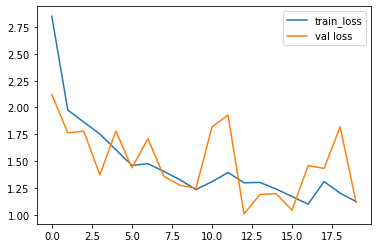

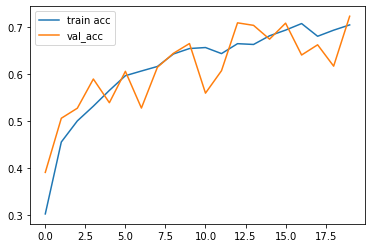

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('AccsVal_acc')

In [28]:
model.save('resnet101_weights.h5')

In [29]:
results = model.evaluate(test_set, batch_size=32)

94/94 [==============================] - 17s 183ms/step - loss: 1.1637 - accuracy: 0.7070
